<a href="https://colab.research.google.com/github/najlaatikahdwirahma/FinalProject/blob/main/Data_Visualization_Najla_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/[DS Final Project] Team Athena/[FIX] Dataset Churn Final/df_master_2bulan.parquet')

In [ ]:
df.head()

,customer_id,name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,...,total_promo_amount,avg_homepage,avg_scroll,avg_click,item_detail,avg_promo_page,avg_search,avg_add_to_cart,avg_add_promo,churn
0,3,Ganep Mustofa,76412a05-64ab-4e8c-b275-a7181b5c0b9d,76412a05_64ab_4e8c_b275_a7181b5c0b9d@startupca...,M,1986-07-12,Android,dd0c9125-c645-4b82-8d4b-a1cd1e2dba20,Android 3.2.3,-6.151858,...,5941311.25,2.214556,1.304348,2.019849,0.891304,0.630435,1.043478,2.945652,0.521739,0
1,9,Hesti Purwanti,8abe001b-5d2e-4af1-8c12-0b44309d38ca,8abe001b_5d2e_4af1_8c12_0b44309d38ca@startupca...,F,2006-04-05,Android,ece472e7-ab36-4d85-aca0-2df8491189fe,Android 5.1.1,-6.035939,...,0.00,1.000000,0.750000,1.375000,0.625000,0.375000,0.500000,2.000000,0.000000,0
2,15,Tari Hassanah,fa713b1b-3f29-41a5-abba-bba5df3c9290,fa713b1b_3f29_41a5_abba_bba5df3c9290@startupca...,F,1983-06-28,Android,aea56e94-eea4-462f-b717-bdf8722047b7,Android 4.3,-7.321196,...,379725.00,1.200000,0.200000,1.400000,0.400000,0.000000,0.400000,1.400000,0.600000,1
3,17,Galang Ardianto,dd087b37-dbb5-452a-87c9-e1d3a8e98fce,dd087b37_dbb5_452a_87c9_e1d3a8e98fce@startupca...,M,2003-02-19,Android,d51a0a7a-f8d9-42bd-b3dc-7389e792ff5d,Android 8.1.0,-7.130857,...,0.00,1.000000,0.000000,2.000000,0.500000,0.500000,0.000000,0.500000,0.000000,1
4,18,Kamaria Hasanah,67165969-a5fe-470e-8a06-f4f5a497a7ec,67165969_a5fe_470e_8a06_f4f5a497a7ec@startupca...,F,1995-03-30,Android,87211c03-3257-4b81-8131-4b9613bbd085,Android 2.3,-6.951992,...,1528154.00,2.833333,2.111111,3.888889,1.888889,0.444444,2.055556,1.444444,0.500000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41504 entries, 0 to 41503
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            41504 non-null  int64         
 1   name                   41504 non-null  object        
 2   username               41504 non-null  object        
 3   email                  41504 non-null  object        
 4   gender                 41504 non-null  category      
 5   birthdate              41504 non-null  datetime64[ns]
 6   device_type            41504 non-null  category      
 7   device_id              41504 non-null  object        
 8   device_version         41504 non-null  category      
 9   home_location_lat      41504 non-null  float64       
 10  home_location_long     41504 non-null  float64       
 11  home_country           41504 non-null  category      
 12  first_join_date        41504 non-null  datetime64[ns]
 13  u

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

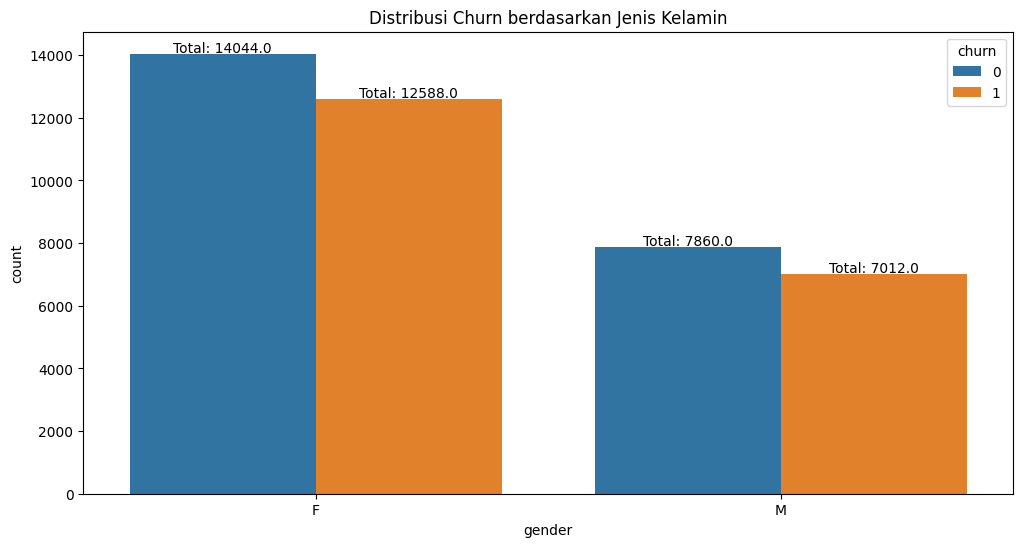

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='gender', data=df, hue='churn')
plt.title('Distribusi Churn berdasarkan Jenis Kelamin')

for p in ax.patches:
    ax.annotate(f'\nTotal: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

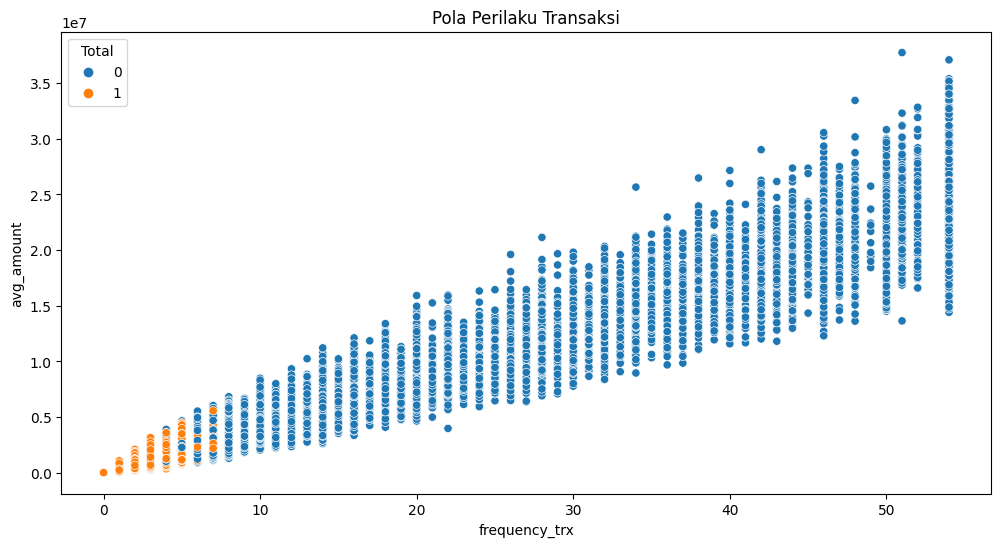

In [ ]:
# 3. Pola Perilaku Transaksi
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x='frequency_trx', y='avg_amount', hue='churn', data=df)
plt.title('Pola Perilaku Transaksi')

# Tambahkan total di setiap legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels + [f'Total Churn: {df["churn"].sum()}', f'Total Non-Churn: {len(df) - df["churn"].sum()}'], title='Total')

plt.show()

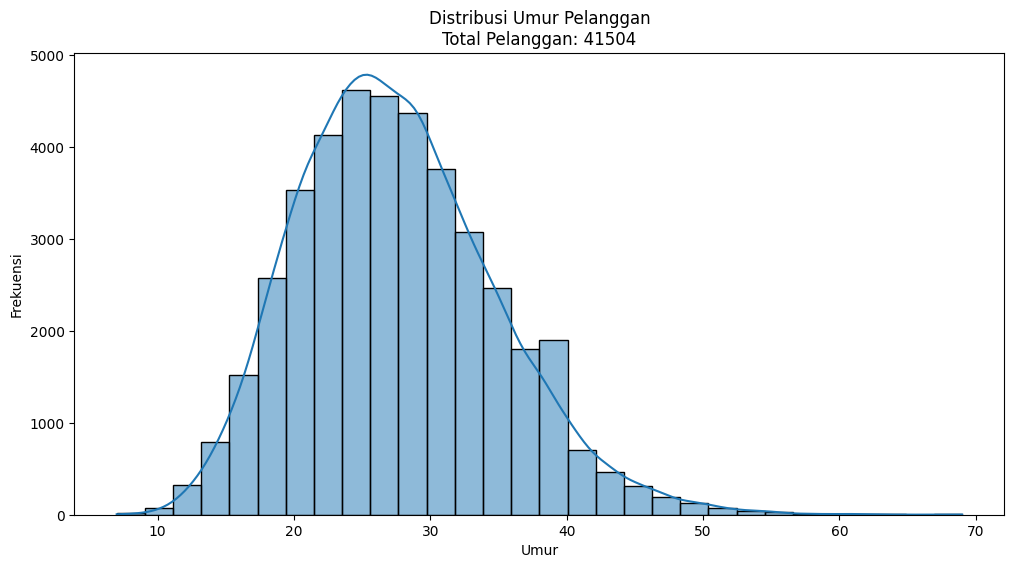

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['umur'], bins=30, kde=True)
plt.title('Distribusi Umur Pelanggan\nTotal Pelanggan: {}'.format(len(df)))
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

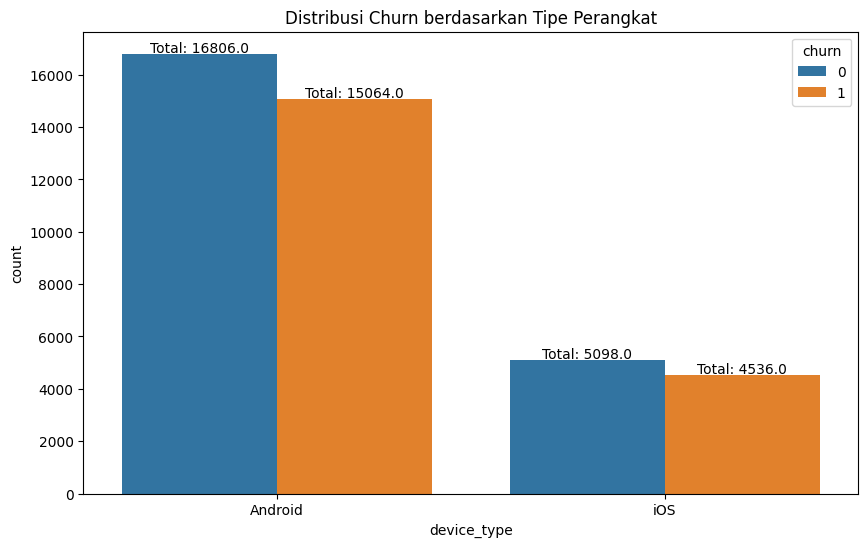

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='device_type', data=df, hue='churn')
plt.title('Distribusi Churn berdasarkan Tipe Perangkat')

# Tambahkan total di setiap bar
for p in ax.patches:
    ax.annotate(f'\nTotal: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

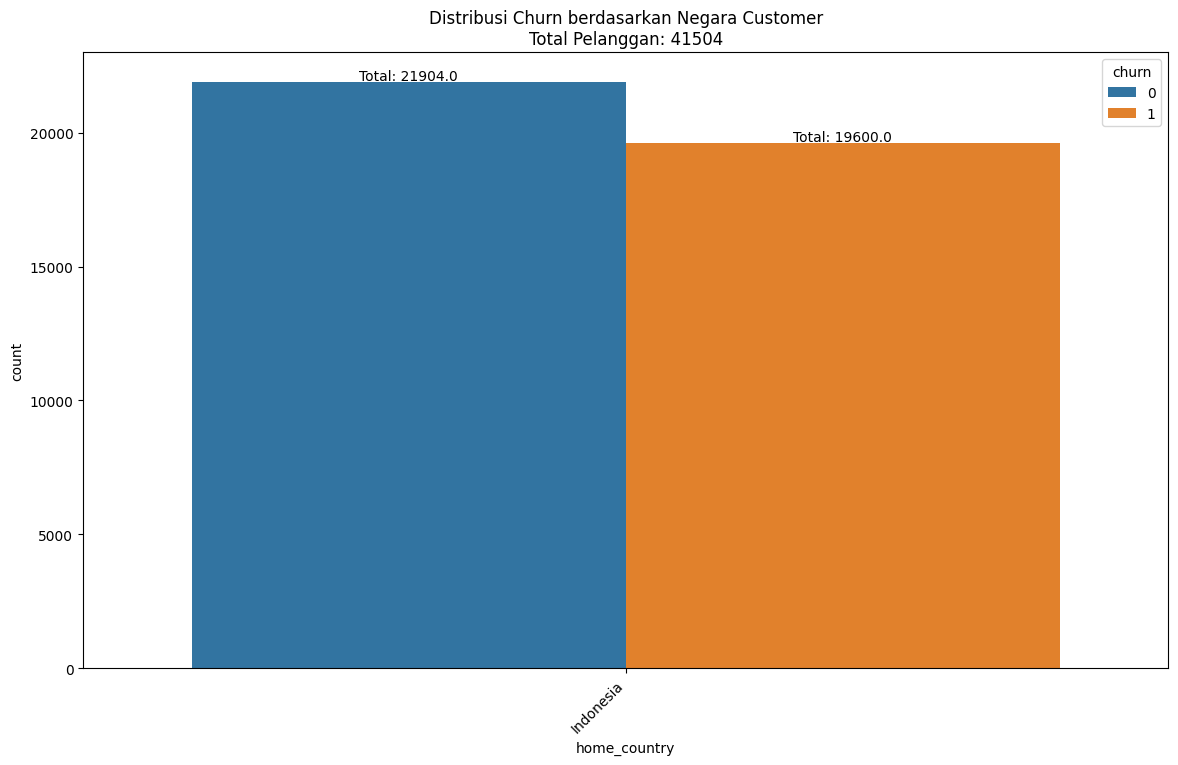

In [ ]:
# 3. Analisis Negara Customer
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='home_country', data=df, order=df['home_country'].value_counts().index, hue='churn')
plt.title('Distribusi Churn berdasarkan Negara Customer\nTotal Pelanggan: {}'.format(len(df)))

# Tambahkan total di setiap bar
for p in ax.patches:
    ax.annotate(f'\nTotal: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df['home_country'].value_counts()

Indonesia    41504
Name: home_country, dtype: int64

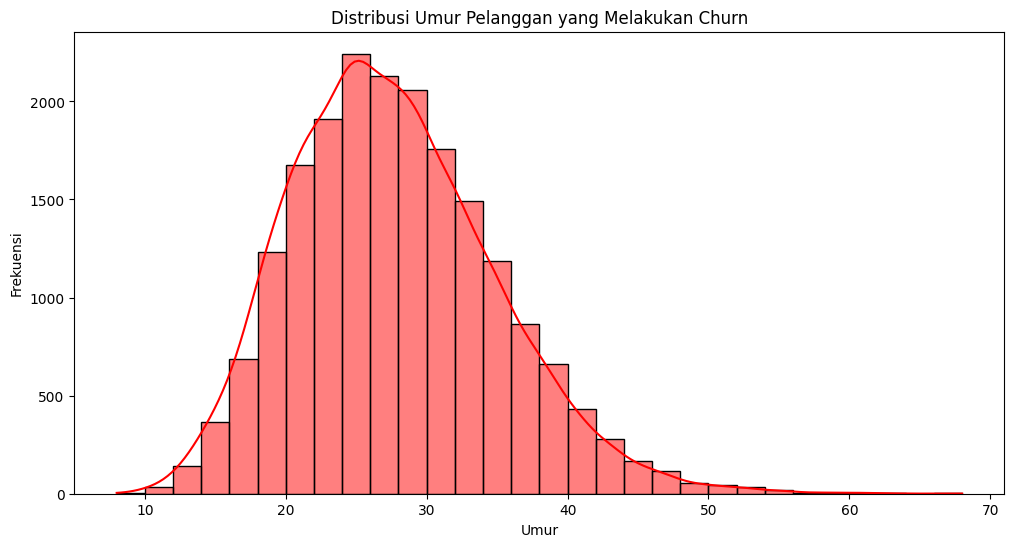

In [ ]:
df_churn = df[df['churn'] == 1]

# Visualisasi distribusi umur pelanggan yang melakukan churn
plt.figure(figsize=(12, 6))
sns.histplot(df_churn['umur'], bins=30, kde=True, color='red')
plt.title('Distribusi Umur Pelanggan yang Melakukan Churn')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
df['gender'].value_counts()

F    26632
M    14872
Name: gender, dtype: int64

In [ ]:
df_churn['umur'].value_counts()

25    1171
24    1072
27    1065
26    1064
28    1043
29    1014
23     973
22     937
30     936
21     901
31     819
32     807
20     775
33     684
19     682
34     620
35     567
18     551
36     465
37     400
17     395
38     360
39     299
16     291
40     231
15     210
41     203
14     156
42     140
43     138
13      89
44      88
45      78
46      58
47      56
12      51
48      31
49      26
50      23
11      22
51      19
53      17
52      16
10      14
55      12
56       5
58       5
54       5
61       3
60       3
8        2
63       2
9        2
68       1
59       1
57       1
66       1
Name: umur, dtype: int64

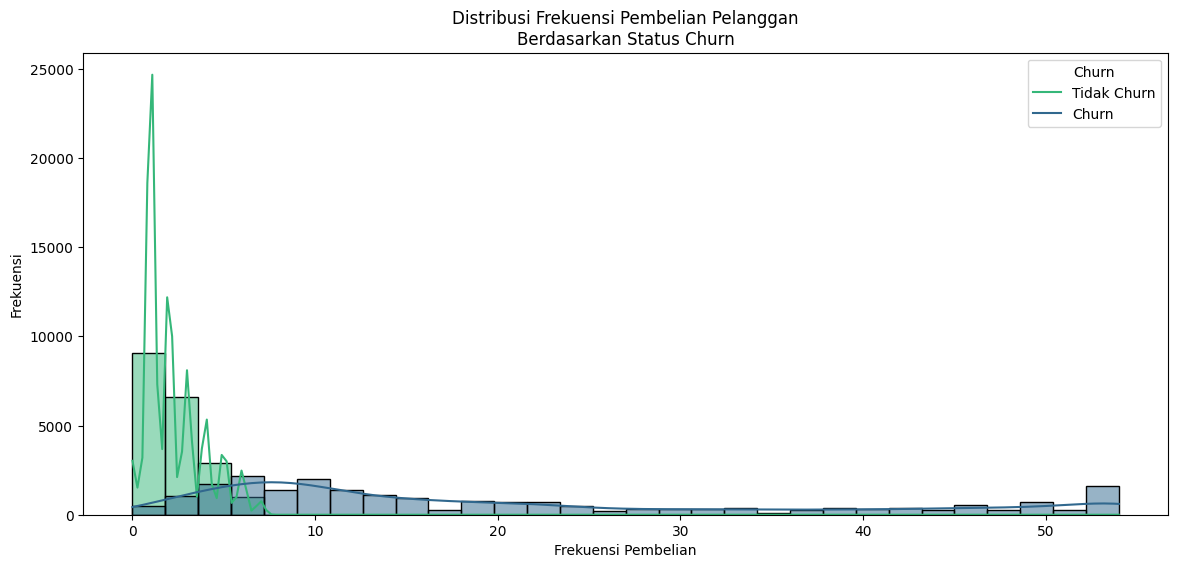

In [ ]:
# Visualisasi pola transaksi: Frekuensi Pembelian
plt.figure(figsize=(14, 6))
sns.histplot(df, x='frequency_trx', hue='churn', bins=30, kde=True, palette='viridis')
plt.title('Distribusi Frekuensi Pembelian Pelanggan\nBerdasarkan Status Churn')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Frekuensi')
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])
plt.show()

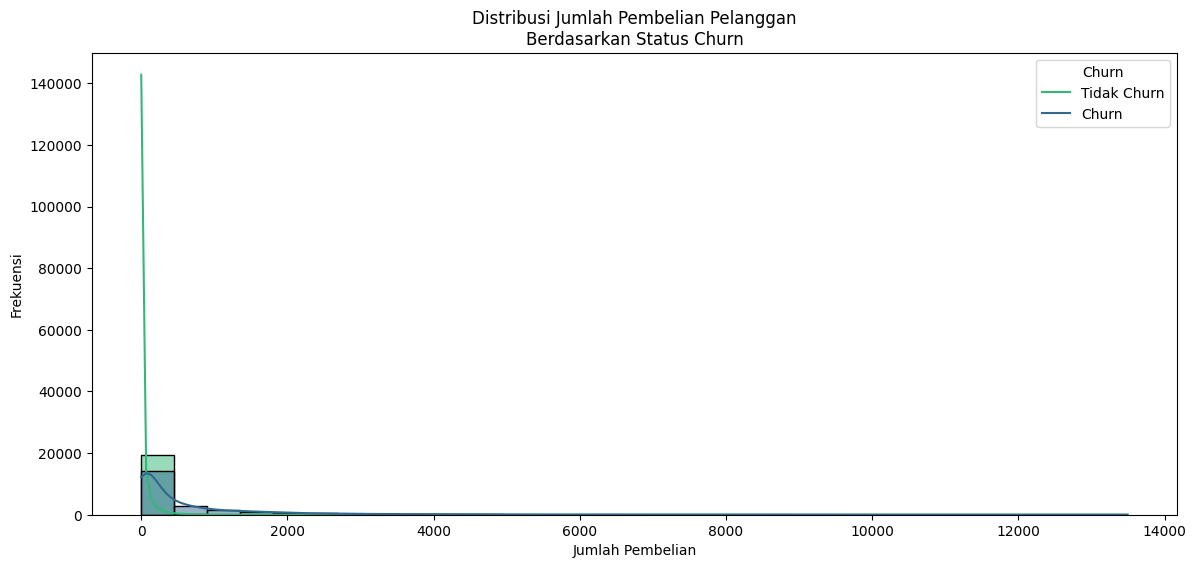

In [ ]:
# Visualisasi pola transaksi: Jumlah Pembelian
plt.figure(figsize=(14, 6))
sns.histplot(df, x='total_quantity', hue='churn', bins=30, kde=True, palette='viridis')
plt.title('Distribusi Jumlah Pembelian Pelanggan\nBerdasarkan Status Churn')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Frekuensi')
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])
plt.show()

In [ ]:
churn_stats = df[df['churn'] == 1]['subscription_duration'].describe()

# Deskripsi statistik durasi penggunaan untuk pelanggan yang tidak churn
non_churn_stats = df[df['churn'] == 0]['subscription_duration'].describe()

# Menampilkan hasil deskripsi statistik
print("Statistik Durasi Penggunaan untuk Pelanggan yang Churn:")
print(churn_stats)
print("\nStatistik Durasi Penggunaan untuk Pelanggan yang Tidak Churn:")
print(non_churn_stats)

Statistik Durasi Penggunaan untuk Pelanggan yang Churn:
count    19600.000000
mean         3.870327
std          1.677571
min          1.293151
25%          2.408219
50%          3.594521
75%          5.263014
max          7.380822
Name: subscription_duration, dtype: float64

Statistik Durasi Penggunaan untuk Pelanggan yang Tidak Churn:
count    21904.000000
mean         3.763952
std          1.665017
min          1.378082
25%          2.304110
50%          3.367123
75%          5.131507
max          7.378082
Name: subscription_duration, dtype: float64


In [ ]:
df['subscription_duration'].value_counts()

2.350685    146
2.290411    145
2.331507    142
2.293151    140
2.312329    139
           ... 
6.556164      1
3.887671      1
6.673973      1
3.931507      1
6.553425      1
Name: subscription_duration, Length: 2204, dtype: int64

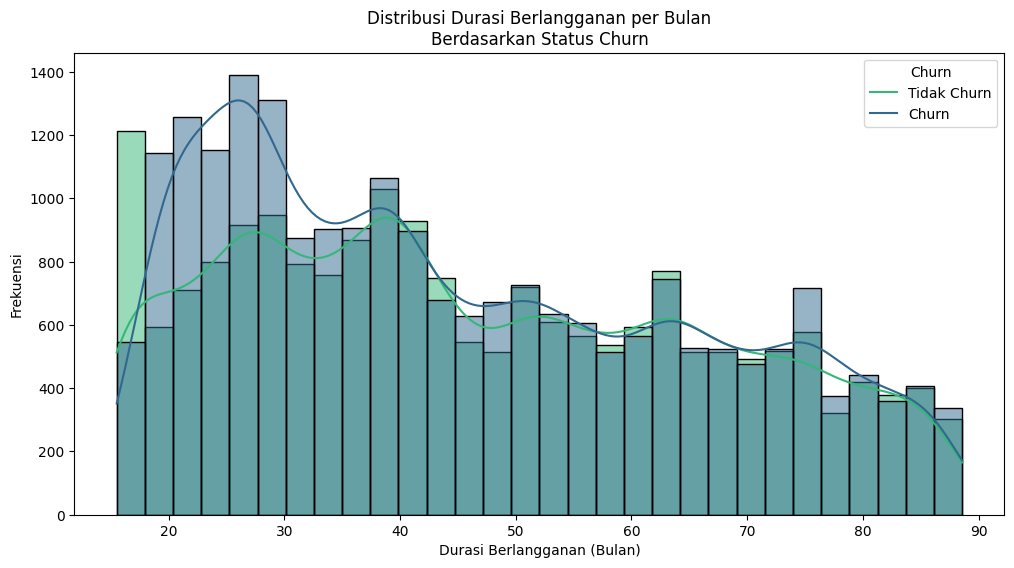

In [ ]:
df['subscription_duration_monthly'] = df['subscription_duration'] * 12

# Visualisasi distribusi durasi berlangganan per bulan antara yang churn dan tidak churn
plt.figure(figsize=(12, 6))
sns.histplot(df, x='subscription_duration_monthly', hue='churn', bins=30, kde=True, palette='viridis')
plt.title('Distribusi Durasi Berlangganan per Bulan\nBerdasarkan Status Churn')
plt.xlabel('Durasi Berlangganan (Bulan)')
plt.ylabel('Frekuensi')
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])
plt.show()

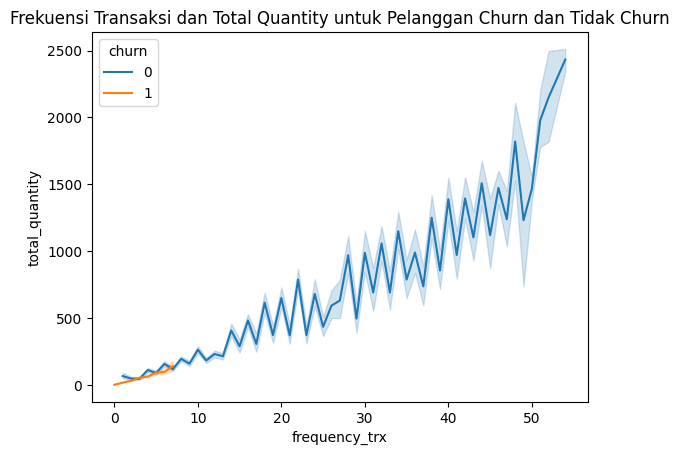

In [ ]:
sns.lineplot(x='frequency_trx', y='total_quantity', hue='churn', data=df)
plt.title('Frekuensi Transaksi dan Total Quantity untuk Pelanggan Churn dan Tidak Churn')
plt.show()

In [ ]:
# Menampilkan informasi kolom 'frequency_trx' dan 'total_quantity'
print(df[['frequency_trx', 'total_quantity']].info())

# Menampilkan beberapa data dari kolom tersebut
print(df[['frequency_trx', 'total_quantity']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41504 entries, 0 to 41503
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frequency_trx   41504 non-null  float64
 1   total_quantity  41504 non-null  float64
dtypes: float64(2)
memory usage: 648.6 KB
None
   frequency_trx  total_quantity
0           46.0           411.0
1            6.0            70.0
2            3.0             0.0
3            1.0             0.0
4           17.0           507.0


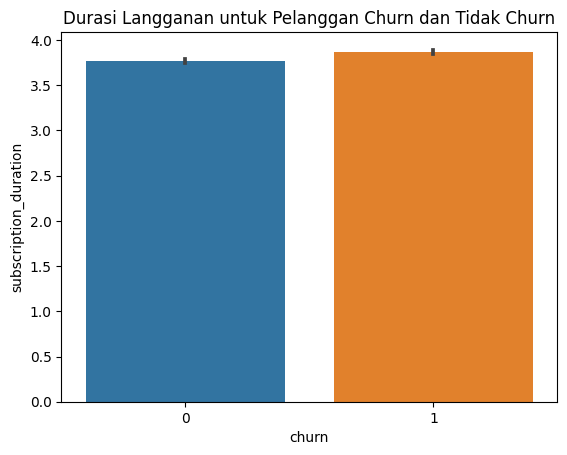

In [ ]:
sns.barplot(x='churn', y='subscription_duration', data=df)
plt.title('Durasi Langganan untuk Pelanggan Churn dan Tidak Churn')
plt.show()

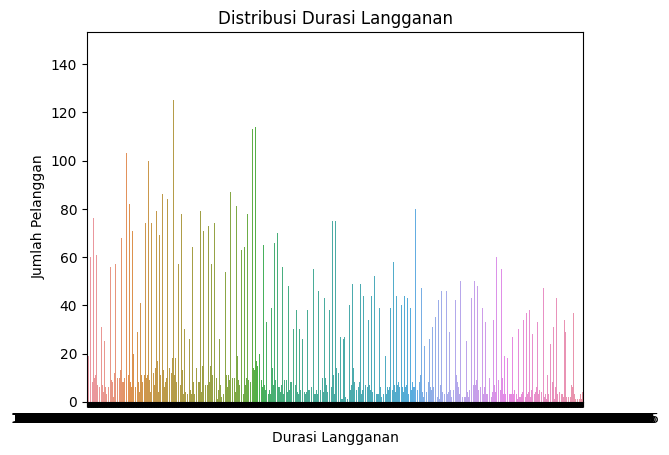

In [ ]:
sns.countplot(x='subscription_duration', data=df)
plt.title('Distribusi Durasi Langganan')
plt.xlabel('Durasi Langganan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

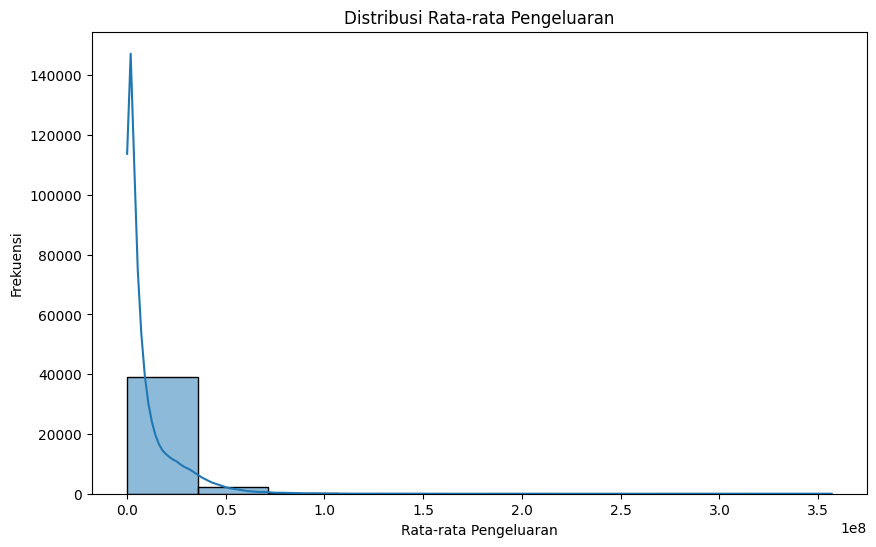

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='average_spending', data=df, bins=10, kde=True)
plt.title('Distribusi Rata-rata Pengeluaran')
plt.xlabel('Rata-rata Pengeluaran')
plt.ylabel('Frekuensi')
plt.show()

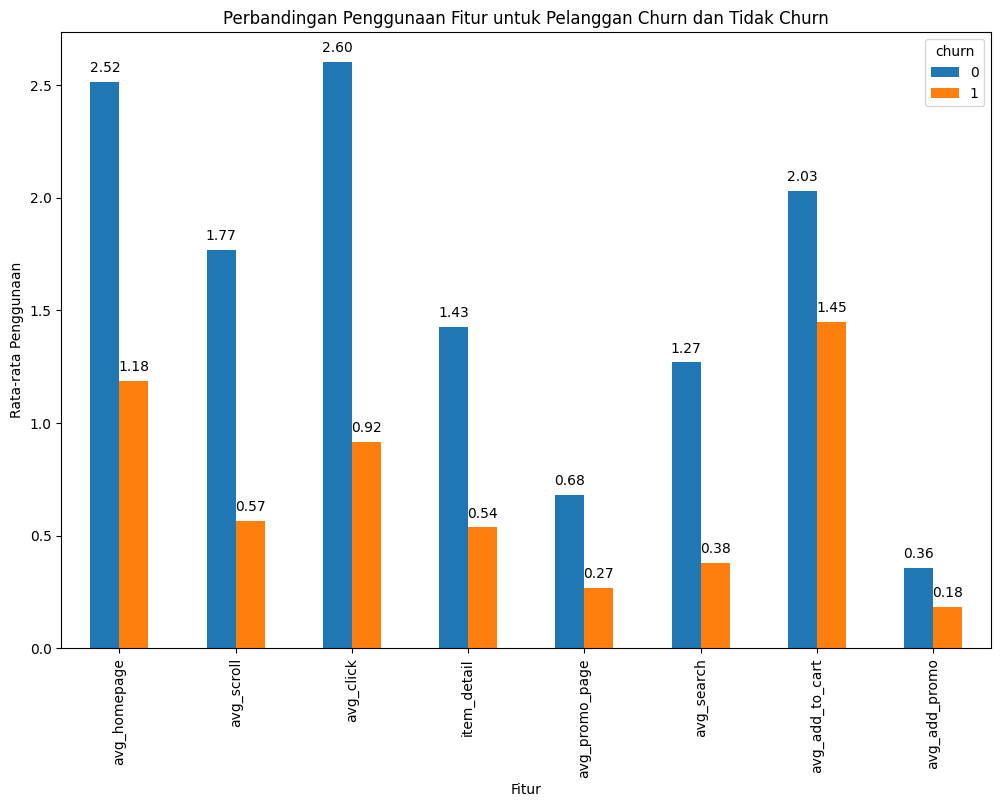

In [ ]:
# Mengambil rata-rata penggunaan fitur untuk pelanggan yang churn dan tidak churn
churn_comparison = df.groupby('churn')[features].mean().transpose()

# Menampilkan grafik batang perbandingan penggunaan fitur dengan total
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bar untuk setiap kategori (churn dan tidak churn)
churn_comparison.plot(kind='bar', ax=ax)

# Menambahkan bar total di atas bar sebelumnya
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menambahkan label dan judul
plt.title('Perbandingan Penggunaan Fitur untuk Pelanggan Churn dan Tidak Churn')
plt.xlabel('Fitur')
plt.ylabel('Rata-rata Penggunaan')

# Menampilkan grafik
plt.show()


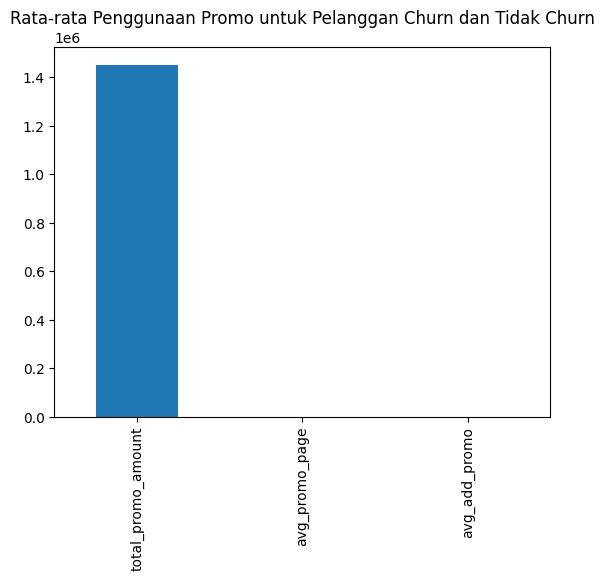

In [ ]:
promo_features = ['total_promo_amount', 'avg_promo_page', 'avg_add_promo']
df[promo_features].mean().plot(kind='bar')
plt.title('Rata-rata Penggunaan Promo untuk Pelanggan Churn dan Tidak Churn')
plt.show()